In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from patsy import dmatrices, dmatrix
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression

In [136]:
df = pd.read_csv('2013_movies.txt')

In [137]:
df.head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


## Q1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [138]:
df['Constant']= 1

In [139]:
df.head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,1
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00,1
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00,1
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,1
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00,1


In [140]:
y, X = dmatrices('DomesticTotalGross ~ 1', data=df, return_type='dataframe')

In [71]:
model = sm.OLS(y, X)
results = model.fit()

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Fri, 22 Jul 2016   Prob (F-statistic):                nan
Time:                        15:25:29   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
df_constant = df[['DomesticTotalGross', 'Constant']]
df_constant.head(10)

,DomesticTotalGross,Constant
0,424668047,1
1,409013994,1
2,400738009,1
3,368061265,1
4,291045518,1
5,274092705,1
6,268492764,1
7,258366855,1
8,238679850,1
9,234911825,1


In [74]:
df_constant['DomesticTotalGross'].mean()

100596875.22

In [75]:
print results.params

Intercept    1.005969e+08
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b13b750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b47b2d0>]], dtype=object)

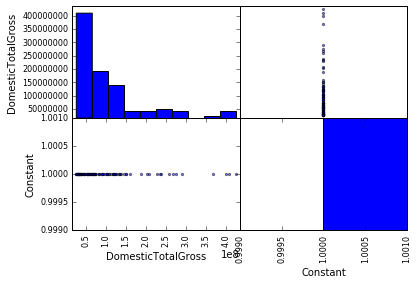

In [65]:
pd.tools.plotting.scatter_matrix(df_constant)

In [76]:
import statsmodels.formula.api as sm

In [78]:
model = sm.OLS(df_constant['DomesticTotalGross'], df_constant['Constant']).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Fri, 22 Jul 2016   Prob (F-statistic):                nan
Time:                        15:30:15   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
df_constant['Mean'] = 100596875.22
df_constant.head(10)

/Users/allison18paige/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DomesticTotalGross,Constant,Mean
0,424668047,1,1.005969e+08
1,409013994,1,1.005969e+08
2,400738009,1,1.005969e+08
3,368061265,1,1.005969e+08
4,291045518,1,1.005969e+08
5,274092705,1,1.005969e+08
6,268492764,1,1.005969e+08
7,258366855,1,1.005969e+08
8,238679850,1,1.005969e+08
9,234911825,1,1.005969e+08


In [81]:
df_constant['Residual'] = df_constant['DomesticTotalGross'] - df_constant['Mean']
df_constant.head()

/Users/allison18paige/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DomesticTotalGross,Constant,Mean,Residual
0,424668047,1,1.005969e+08,3.240712e+08
1,409013994,1,1.005969e+08,3.084171e+08
2,400738009,1,1.005969e+08,3.001411e+08
3,368061265,1,1.005969e+08,2.674644e+08
4,291045518,1,1.005969e+08,1.904486e+08


In [88]:
df_constant = df_constant.drop('Mean', 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d6fdbd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ea576d0>]], dtype=object)

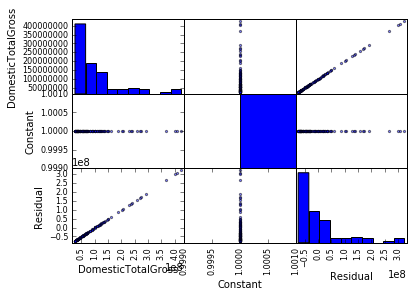

In [89]:
pd.tools.plotting.scatter_matrix(df_constant)

## Q2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?


In [90]:
df['Mean'] = 100596875.22
df['Residual'] = df['DomesticTotalGross'] - df['Mean']
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant,Mean,Residual
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,1.005969e+08,3.240712e+08
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,1.005969e+08,3.084171e+08
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1.005969e+08,3.001411e+08
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1.005969e+08,2.674644e+08
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,1.005969e+08,1.904486e+08


In [98]:
df2 = df[['Budget', 'DomesticTotalGross', 'Residual', 'Constant']]
df2.head()

,Budget,DomesticTotalGross,Residual,Constant
0,130000000.0,424668047,3.240712e+08,1
1,200000000.0,409013994,3.084171e+08,1
2,150000000.0,400738009,3.001411e+08,1
3,76000000.0,368061265,2.674644e+08,1
4,225000000.0,291045518,1.904486e+08,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121febd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1228ff190>]], dtype=object)

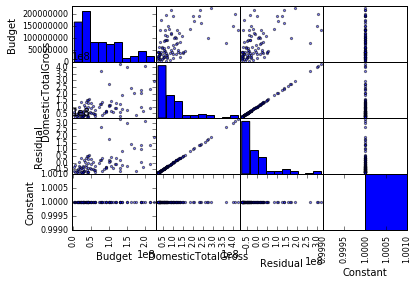

In [95]:
pd.tools.plotting.scatter_matrix(df2)

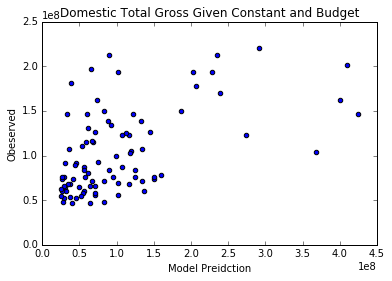

In [141]:
y, X = dmatrices('DomesticTotalGross ~ Constant + Budget', data = df2, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))
plt.title('Domestic Total Gross Given Constant and Budget')
plt.ylabel('Obeserved')
plt.xlabel('Model Preidction')

## Q3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [109]:
rating = df['Rating']
y, X = dmatrices('DomesticTotalGross ~ Rating', data=df, return_type='dataframe')

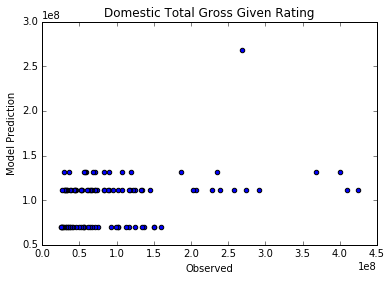

In [142]:
y, X = dmatrices('DomesticTotalGross ~ Rating', data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))
plt.title('Domestic Total Gross Given Rating')
plt.xlabel('Observed')
plt.ylabel('Model Prediction')

In [143]:
clf.score(X, y)

0.10922931211582154

> Not a high correlation between DTG and Rating

## Q4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

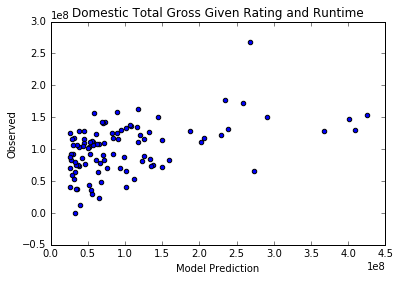

In [148]:
y, X = dmatrices('DomesticTotalGross ~ Rating + np.log(Runtime)', data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))
plt.title('Domestic Total Gross Given Rating and Runtime')
plt.ylabel('Observed')
plt.xlabel('Model Prediction')

## Q5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [149]:
from sklearn import cross_validation as cv
from sklearn import metrics

In [150]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

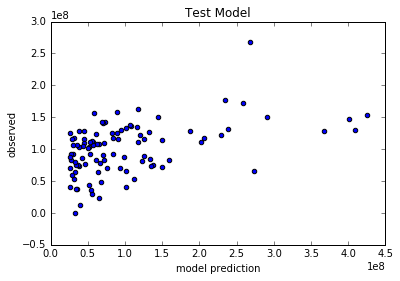

In [151]:
model.predict(X)
plt.scatter(y, clf.predict(X))
model.score(X, y)
plt.title('Test Model')
plt.ylabel('observed')
plt.xlabel('model prediction')

In [152]:
print metrics.mean_squared_error(y_train,model.predict(x_train))
print metrics.mean_squared_error(y_test,model.predict(x_test))

6.0431026455e+15
5.96527640177e+15
